# Usage for WFR package

In [1]:
import WFR
import numpy as np
import matplotlib.pyplot as plt
import time

We will write a function to generate a random Measure Object that satifies the closure condition.

In [2]:
def randMeas(num):    
    v = 100*np.random.rand(num-1,3)-50
    vend = -1*np.sum(v,axis=0)
    a = np.zeros((num,1))
    u = np.zeros((num,3))
    for i in range(0,num-1):
        a[i] = np.sqrt(np.sum(np.power(v[i,:],2)))
        u[i,:] = v[i,:]/a[i]
        
    a[num-1]= np.sqrt(np.sum(np.power(vend,2)))
    u[num-1]= vend/a[num-1]
    return WFR.Measure(u,a)

Choose parameters for the distance computation.

In [3]:
NoIterations=1000  # Maximum number of iterations before the algorithm terminates
eps = 1e-6         # Minimum relative increase the algorithm terminates

measure1 = randMeas(10000)  #Generate a random measure with 10000 supports
measure2 = randMeas(1000)  #Generate a random measure with 1000 supports

totalMass1=np.sum(measure1.masses)
totalMass2=np.sum(measure2.masses)

print("The total mass of measure 1 is: {}".format(totalMass1))
print("The total mass of measure 2 is: {}".format(totalMass2))

The total mass of measure 1 is: 485111.37304702925
The total mass of measure 2 is: 49526.74061786328


Now we will compute the WFR distance using Algorithm 1 from *The Square Root Normal Field Metric and Unbalanced Optimal Transport*.

In [4]:

timestart = time.time();
dist,cost,ind,P,Q=WFR.measureDistance(measure1,measure2,NoIterations,eps)
totaltime=time.time()-timestart

print("The distance is computed to be: {}+{}-2{}={}".format(totalMass1,totalMass2,cost[ind,0],dist.cpu()[0]))
print("The algorithm took {} iterations to terminate.".format(ind))
print("The algorithm took {} seconds to converge.".format(totaltime))

The distance is computed to be: 485111.37304702925+49526.74061786328-2154146.08243121923=475.7582882120431
The algorithm took 350 iterations to terminate.
The algorithm took 4.0145251750946045 seconds to converge.


Now we can plot the evolution of the cost function F over the iterations of the algorithm.

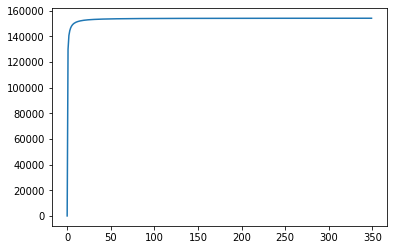

In [5]:
plt.plot(cost[0:ind])
plt.show()

We can also compute the approximate convergence rate at each iteration.

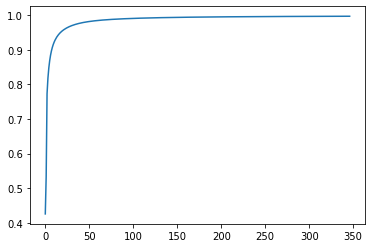

In [6]:
diff=np.diff(cost[0:ind],axis=0)
logquotient=np.log(diff[1:ind-1]/diff[0:ind-2])
aprox_conv_rate=logquotient[1:ind-2]/logquotient[0:ind-3]
plt.plot(aprox_conv_rate)
plt.show()

# Complete Documentation of WFR.py below

In [7]:
help(WFR)

Help on module WFR:

NAME
    WFR

CLASSES
    builtins.object
        Measure
    
    class Measure(builtins.object)
     |  Measure(supports, masses)
     |  
     |  Init        
     |  ----------
     |  Measure Object
     |      returns a Measure Object itialized from a np array representing the supports and the corresponding masses
     |  
     |  Methods defined here:
     |  
     |  __init__(self, supports, masses)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    calcF(P, Q, Omega)
        Parameters
        ----------
        P,Q: two tensors
        pair of tensors representing the square root of current semi-coupling
        ------